In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Read data.

In [2]:
page_view_df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")

page_view_df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


##### Clean data.

In [3]:
page_view_df = page_view_df[(page_view_df["value"] >= page_view_df["value"].quantile(0.025)) & (page_view_df["value"] <= page_view_df["value"].quantile(0.975))]

page_view_df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


##### Draw line plot.

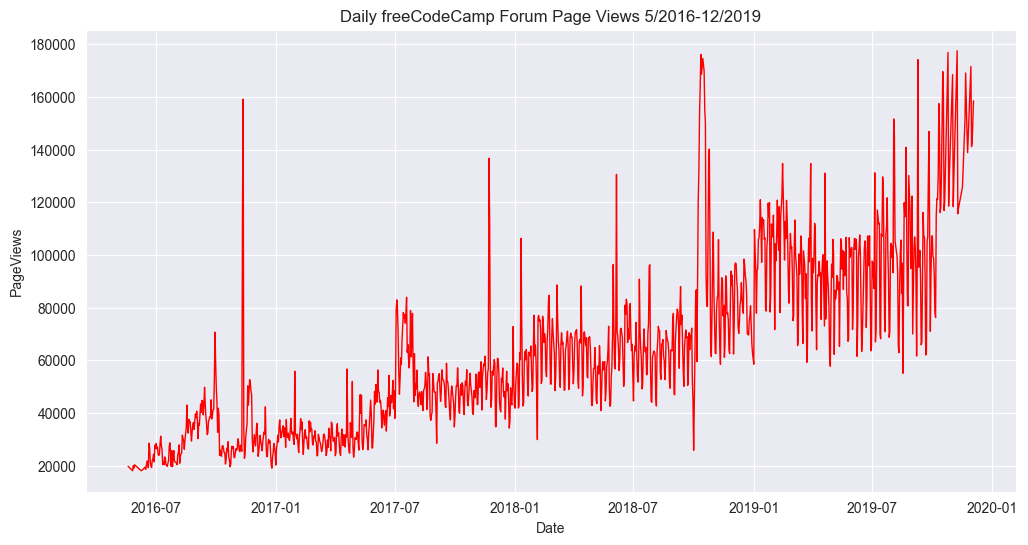

In [4]:
figure, axes = plt.subplots(figsize=(12, 6))

axes.plot(
    page_view_df.index,
    page_view_df["value"],
    color="r",
    linewidth=1,
)

axes.set(
    title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019",
    xlabel="Date",
    ylabel="PageViews",
)

plt.show()

##### Copy and modify data for monthly bar plot.

In [5]:
page_view_df["month"] = page_view_df.index.month
page_view_df["year"] = page_view_df.index.year

page_view_df_bar = page_view_df.groupby(["year", "month"])["value"].mean()
page_view_df_bar = page_view_df_bar.unstack()

page_view_df_bar

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


##### Draw bar plot.

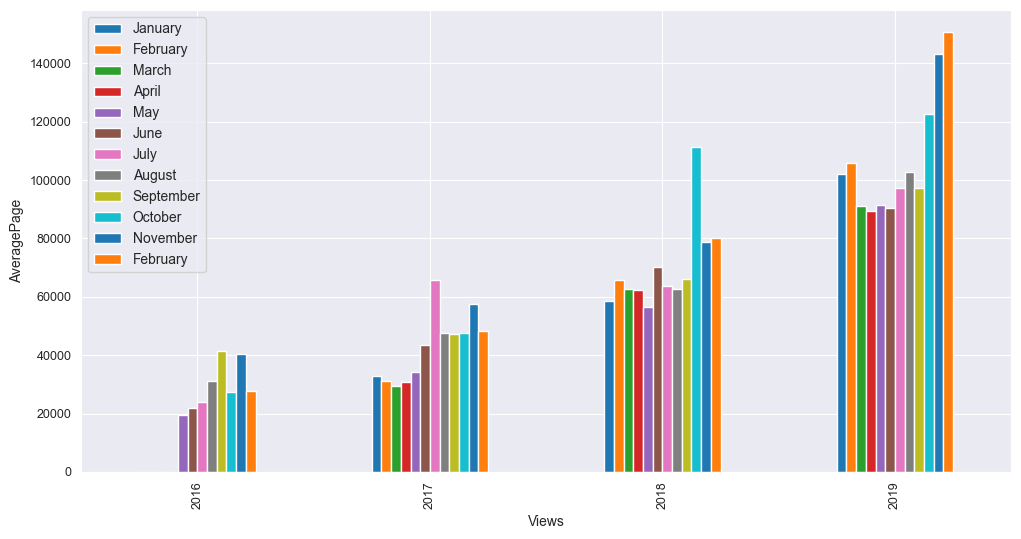

In [6]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "February"]

page_view_df_bar = page_view_df_bar.plot.bar(
    legend=True,
    figsize=(12, 6),
    xlabel="Views",
    ylabel="AveragePage",
).figure

plt.legend(months)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.show()

##### Prepare data for box plots.

In [7]:
page_view_df_box = page_view_df.copy()
page_view_df_box.reset_index(inplace=True)
page_view_df_box["year"] = [d.year for d in page_view_df_box.date]
page_view_df_box["month"] = [d.strftime("%b") for d in page_view_df_box.date]

page_view_df_box.head()

,date,value,month,year
0,2016-05-19,19736,May,2016
1,2016-05-26,18060,May,2016
2,2016-05-27,19997,May,2016
3,2016-05-28,19044,May,2016
4,2016-05-29,20325,May,2016


##### Draw box plots.

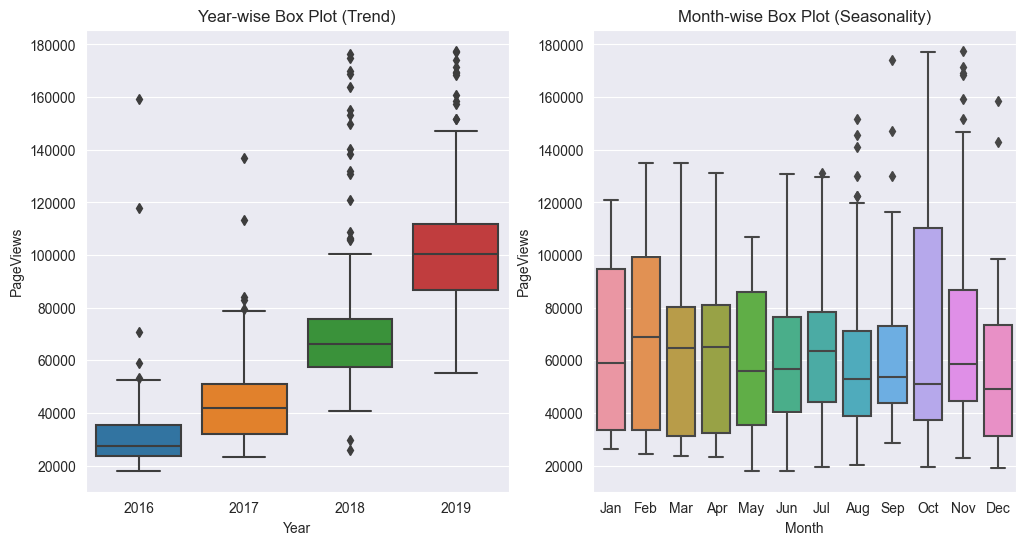

In [8]:
page_view_df_box["month_number"] = page_view_df_box["date"].dt.month
page_view_df_box = page_view_df_box.sort_values("month_number")

figure, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(12, 6),
)

axes[0] = sns.boxplot(
    x=page_view_df_box["year"],
    y=page_view_df_box["value"],
    ax=axes[0]
)
axes[1] = sns.boxplot(
    x=page_view_df_box["month"],
    y=page_view_df_box["value"],
    ax=axes[1]
)

axes[0].set(
    title="Year-wise Box Plot (Trend)",
    xlabel="Year",
    ylabel="PageViews",
)
axes[1].set(
    title="Month-wise Box Plot (Seasonality)",
    xlabel="Month",
    ylabel="PageViews",
)

plt.show()